Sunspot dataset

This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).

The units are a count and there are 2,820 observations. The source of the dataset is credited to Andrews & Herzberg (1985).

Load libraries

In [991]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

Load and read dataset

In [992]:
# load dataset
train = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

In [993]:
df

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


In [994]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


Check for null values

In [995]:
train.isnull().sum()

Month       0
Sunspots    0
dtype: int64

Visualise time series

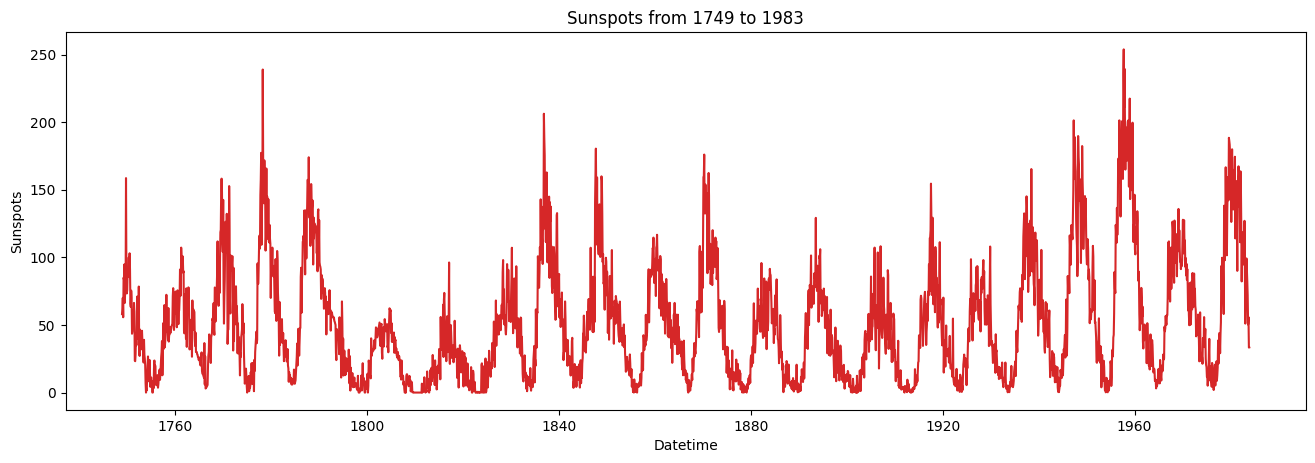

In [996]:
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', parse_dates=['Month'], index_col=['Month'])

def plot_df(train, x, y, title="Sunspots", xlabel='Datetime', ylabel='Sunspots', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train, x=df.index, y=train['Sunspots'], title='Sunspots from 1749 to 1983') 

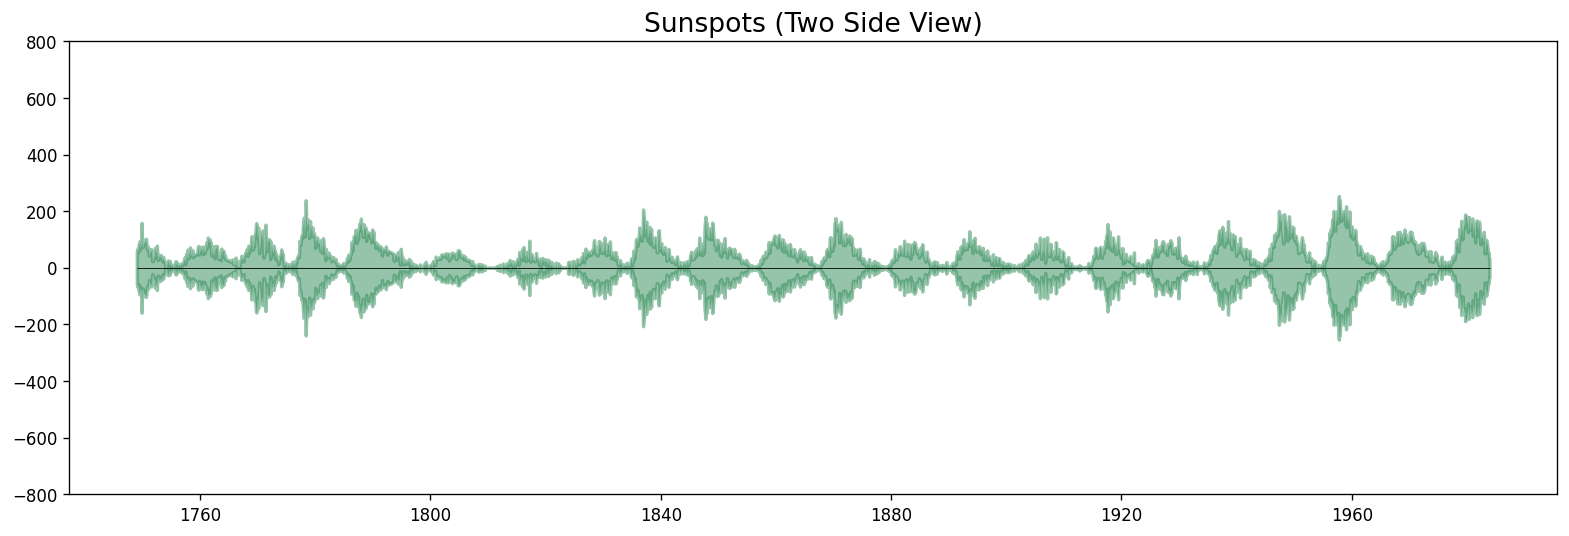

In [997]:
x = df.index.values
y1 = df['Sunspots'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sunspots (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

Graph data

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


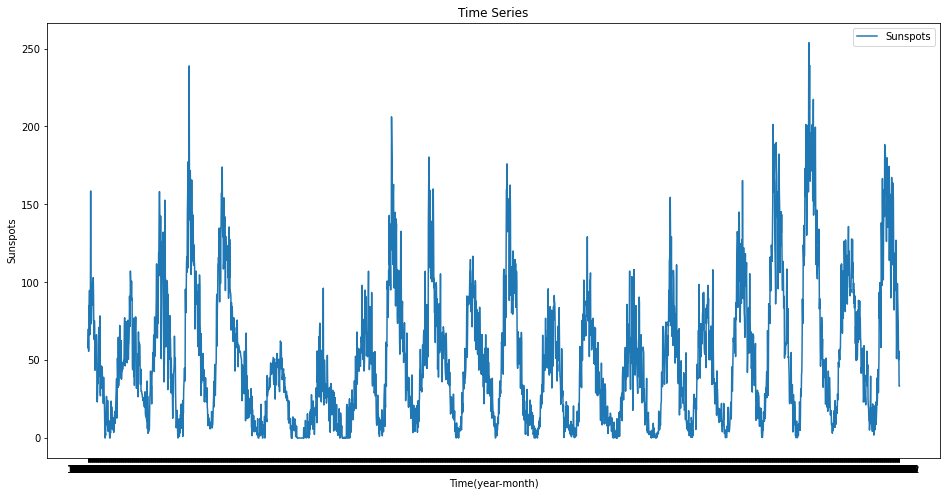

In [998]:
from pandas.plotting import register_matplotlib_converters

train.index = train['Month'] # indexing the Datetime to get the time period on the x-axis. 
ts = train['Sunspots'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Sunspots') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Sunspots") 
plt.legend(loc='best')

Text(0, 0.5, 'Sunspots')

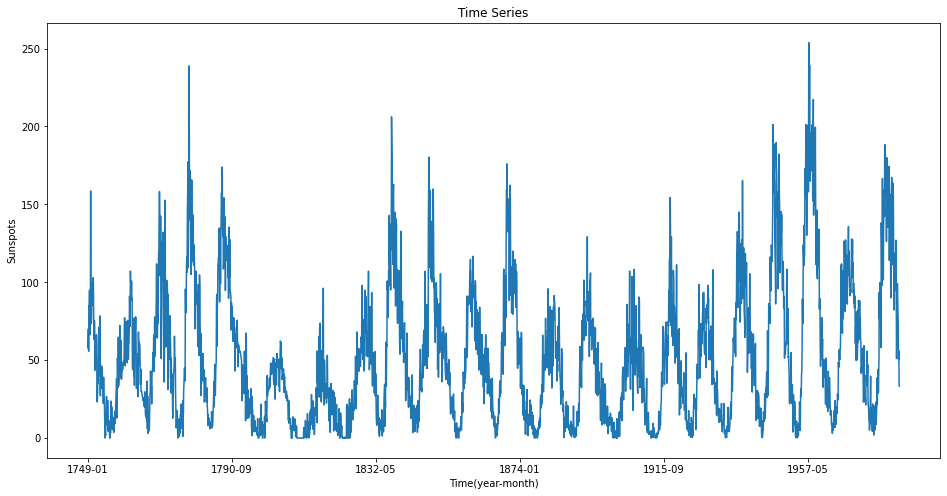

In [999]:
# different way of plotting Sunspots for training dataset. 
train['Sunspots'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Sunspots") 

In [1000]:
year = train['Month'].astype(str)
train['Year'] = year.str[:4]
train

,Month,Sunspots,Year
Month,,,
1749-01,1749-01,58.0,1749
1749-02,1749-02,62.6,1749
1749-03,1749-03,70.0,1749
1749-04,1749-04,55.7,1749
1749-05,1749-05,85.0,1749
...,...,...,...
1983-08,1983-08,71.8,1983
1983-09,1983-09,50.3,1983
1983-10,1983-10,55.8,1983


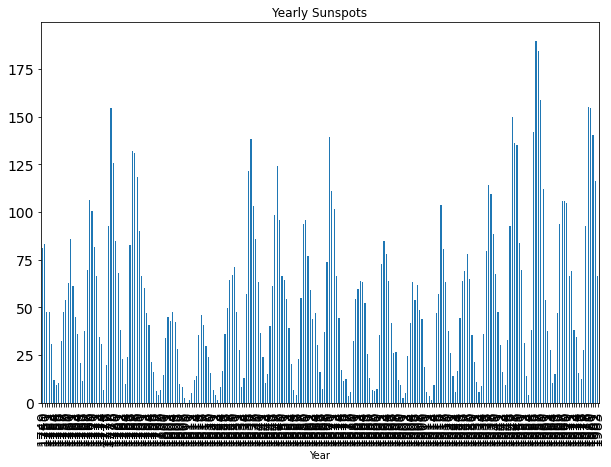

In [1001]:
train.groupby('Year')['Sunspots'].mean().plot.bar(fontsize=14,figsize=(10,7),title='Yearly Sunspots')

In [1002]:
month = train['Month'].astype(str)
train['Month_Num'] = month.str[5:]
train

,Month,Sunspots,Year,Month_Num
Month,,,,
1749-01,1749-01,58.0,1749,01
1749-02,1749-02,62.6,1749,02
1749-03,1749-03,70.0,1749,03
1749-04,1749-04,55.7,1749,04
1749-05,1749-05,85.0,1749,05
...,...,...,...,...
1983-08,1983-08,71.8,1983,08
1983-09,1983-09,50.3,1983,09
1983-10,1983-10,55.8,1983,10


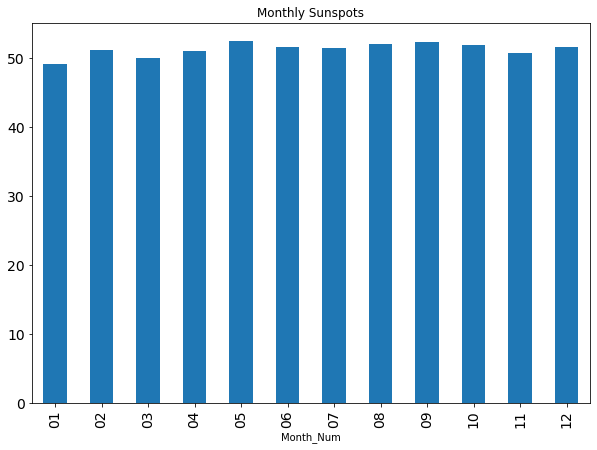

In [1003]:
train.groupby('Month_Num')['Sunspots'].mean().plot.bar(fontsize=14,figsize=(10,7), title='Monthly Sunspots')

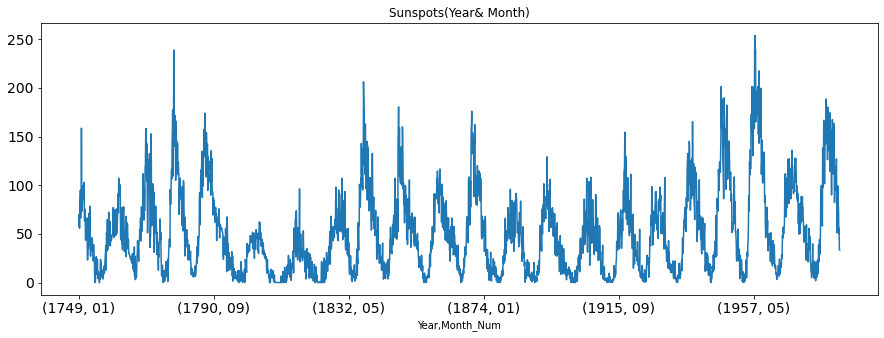

In [1004]:
temp=train.groupby(['Year', 'Month_Num'])['Sunspots'].mean() 
temp.plot(figsize=(15,5), title= 'Sunspots(Year& Month)', fontsize=14)

In [1005]:
train['Timestamp'] = pd.to_datetime(train.Month,format='%Y-%m') 
train.index = train.Timestamp 
# Converting to monthly mean 
monthly = train.resample('M').mean()
train

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1749-01-01,1749-01,58.0,1749,01,1749-01-01
1749-02-01,1749-02,62.6,1749,02,1749-02-01
1749-03-01,1749-03,70.0,1749,03,1749-03-01
1749-04-01,1749-04,55.7,1749,04,1749-04-01
1749-05-01,1749-05,85.0,1749,05,1749-05-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


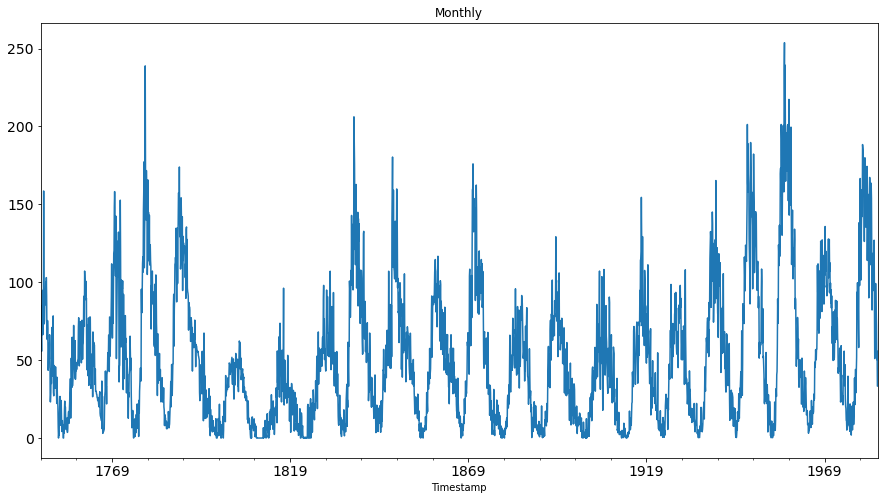

In [1006]:
monthly['Sunspots'].plot(figsize=(15,8), title= 'Monthly', fontsize=14)

Define training and validation dates

In [1007]:
Train=train.loc['1749-01-01':'1949-12-31'] 
valid=train.loc['1950-01-01':'1983-12-01']

In [1008]:
Train

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1749-01-01,1749-01,58.0,1749,01,1749-01-01
1749-02-01,1749-02,62.6,1749,02,1749-02-01
1749-03-01,1749-03,70.0,1749,03,1749-03-01
1749-04-01,1749-04,55.7,1749,04,1749-04-01
1749-05-01,1749-05,85.0,1749,05,1749-05-01
...,...,...,...,...,...
1949-08-01,1949-08,123.8,1949,08,1949-08-01
1949-09-01,1949-09,145.3,1949,09,1949-09-01
1949-10-01,1949-10,131.6,1949,10,1949-10-01


In [1009]:
valid

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1950-01-01,1950-01,101.6,1950,01,1950-01-01
1950-02-01,1950-02,94.8,1950,02,1950-02-01
1950-03-01,1950-03,109.7,1950,03,1950-03-01
1950-04-01,1950-04,113.4,1950,04,1950-04-01
1950-05-01,1950-05,106.2,1950,05,1950-05-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


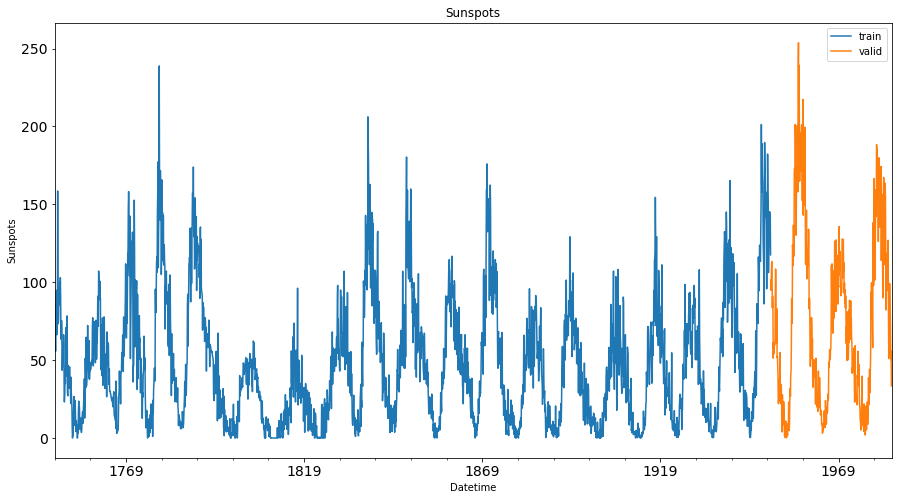

In [1010]:
Train['Sunspots'].plot(figsize=(15,8), title= 'Sunspots', fontsize=14, label='train') 
valid['Sunspots'].plot(figsize=(15,8), title= 'Sunspots', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Sunspots") 
plt.legend(loc='best') 
plt.show()

Naive approach

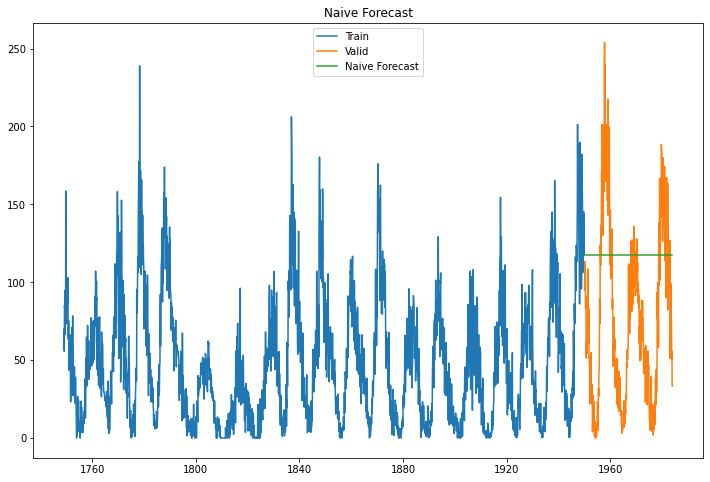

In [1011]:
dd= np.asarray(Train['Sunspots']) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

Calculate errors

In [1012]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat.naive)) 
print(rms)

69.61329230604078


In [1013]:
y_hat

,Month,Sunspots,Year,Month_Num,Timestamp,naive
Timestamp,,,,,,
1950-01-01,1950-01,101.6,1950,01,1950-01-01,117.6
1950-02-01,1950-02,94.8,1950,02,1950-02-01,117.6
1950-03-01,1950-03,109.7,1950,03,1950-03-01,117.6
1950-04-01,1950-04,113.4,1950,04,1950-04-01,117.6
1950-05-01,1950-05,106.2,1950,05,1950-05-01,117.6
...,...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01,117.6
1983-09-01,1983-09,50.3,1983,09,1983-09-01,117.6
1983-10-01,1983-10,55.8,1983,10,1983-10-01,117.6


In [1014]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat.naive.values})
df_val

,Actual,Predicted
0,101.6,117.6
1,94.8,117.6
2,109.7,117.6
3,113.4,117.6
4,106.2,117.6
...,...,...
403,71.8,117.6
404,50.3,117.6
405,55.8,117.6
406,33.3,117.6


Autoregression (AR)

In [1015]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

# fit model
model =AR(Train.Sunspots)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

1950-01-01    113.725288
1950-02-01    106.457611
1950-03-01    111.863498
1950-04-01    101.854109
1950-05-01    110.900008
                 ...    
1983-08-01     46.781902
1983-09-01     46.778156
1983-10-01     46.774559
1983-11-01     46.771116
1983-12-01     46.767830
Freq: MS, Length: 408, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1016]:
y_hat = yhat.values
y_hat

array([113.72528759, 106.45761056, 111.8634979 , 101.85410873,
       110.90000759, 106.44773425, 104.11229957,  96.81025449,
        94.68833642,  86.83937152,  87.64156418,  79.56144556,
        83.10371988,  78.63869468,  77.14344994,  72.02003234,
        68.27225259,  62.07749906,  58.57736775,  60.09686271,
        54.74025183,  55.77722934,  50.25015966,  48.87074062,
        44.64455884,  42.335862  ,  38.35585875,  38.26566033,
        35.24340356,  33.9204228 ,  32.05861137,  30.11004332,
        27.49193823,  26.31543357,  24.03718198,  23.22963108,
        21.85154429,  20.80733603,  19.96319178,  18.8655859 ,
        17.67513231,  16.73528677,  16.35727426,  15.17553895,
        15.63743952,  14.85962359,  14.95067244,  14.56600001,
        14.5610871 ,  14.32075288,  14.68964592,  14.61707836,
        15.08514912,  15.52147355,  15.90317661,  16.38943017,
        17.00958864,  17.48037292,  18.21687453,  18.9745796 ,
        19.72793889,  20.66727677,  21.51211944,  22.44

In [1017]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,113.725288
1,94.8,106.457611
2,109.7,111.863498
3,113.4,101.854109
4,106.2,110.900008
...,...,...
403,71.8,46.781902
404,50.3,46.778156
405,55.8,46.774559
406,33.3,46.771116


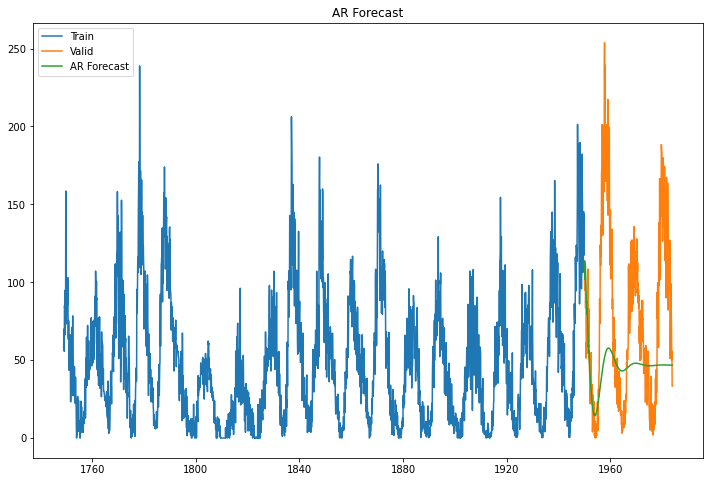

In [1018]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='AR Forecast') 
plt.legend(loc='best') 
plt.title("AR Forecast") 
plt.show()

In [1019]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

61.573904198673404


Moving Average (MA)

In [1020]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model =ARMA(Train.Sunspots, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

1950-01-01    64.281256
1950-02-01    46.918732
1950-03-01    46.918732
1950-04-01    46.918732
1950-05-01    46.918732
                ...    
1983-08-01    46.918732
1983-09-01    46.918732
1983-10-01    46.918732
1983-11-01    46.918732
1983-12-01    46.918732
Freq: MS, Length: 408, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1021]:
y_hat = yhat.values
y_hat

array([64.28125553, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91

In [1022]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,64.281256
1,94.8,46.918732
2,109.7,46.918732
3,113.4,46.918732
4,106.2,46.918732
...,...,...
403,71.8,46.918732
404,50.3,46.918732
405,55.8,46.918732
406,33.3,46.918732


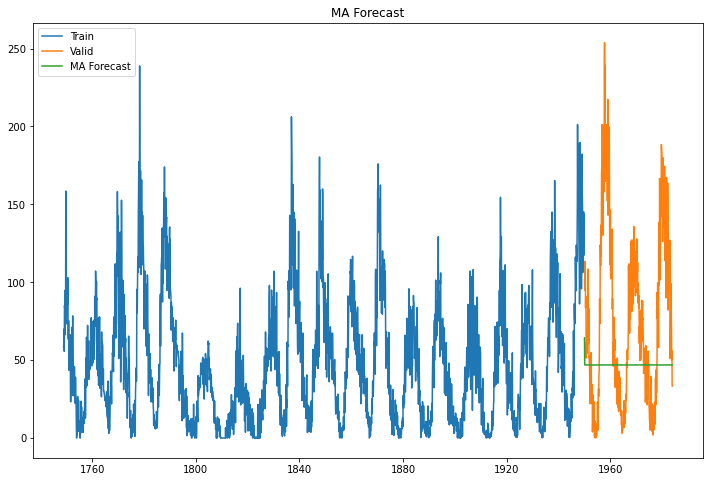

In [1023]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='MA Forecast') 
plt.legend(loc='best') 
plt.title("MA Forecast") 
plt.show()

In [1024]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

64.06346135279794


Autoregressive Moving Average (ARMA)

In [1025]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model =ARMA(Train.Sunspots, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



1950-01-01    122.513250
1950-02-01    122.635621
1950-03-01    121.678265
1950-04-01    120.490752
1950-05-01    119.267342
                 ...    
1983-08-01     49.112939
1983-09-01     49.111813
1983-10-01     49.110707
1983-11-01     49.109619
1983-12-01     49.108551
Freq: MS, Length: 408, dtype: float64


In [1026]:
y_hat = yhat.values
y_hat

array([122.51325025, 122.63562067, 121.67826498, 120.49075249,
       119.2673416 , 118.05222659, 116.85524146, 115.67835647,
       114.52174598, 113.38517788, 112.26833168, 111.17087131,
       110.09246169, 109.03277243, 107.99147863, 106.96826099,
       105.96280572, 104.97480447, 104.00395425, 103.04995734,
       102.11252117, 101.19135826, 100.28618612,  99.39672715,
        98.52270859,  97.6638624 ,  96.8199252 ,  95.99063818,
        95.17574702,  94.37500183,  93.58815703,  92.81497132,
        92.0552076 ,  91.30863286,  90.57501815,  89.8541385 ,
        89.14577284,  88.44970392,  87.76571829,  87.09360619,
        86.4331615 ,  85.78418169,  85.14646772,  84.51982404,
        83.90405847,  83.29898218,  82.7044096 ,  82.1201584 ,
        81.54604941,  80.98190656,  80.42755685,  79.88283027,
        79.34755978,  78.82158123,  78.30473331,  77.79685752,
        77.29779811,  76.80740203,  76.3255189 ,  75.85200094,
        75.38670292,  74.92948217,  74.48019846,  74.03

In [1027]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,122.513250
1,94.8,122.635621
2,109.7,121.678265
3,113.4,120.490752
4,106.2,119.267342
...,...,...
403,71.8,49.112939
404,50.3,49.111813
405,55.8,49.110707
406,33.3,49.109619


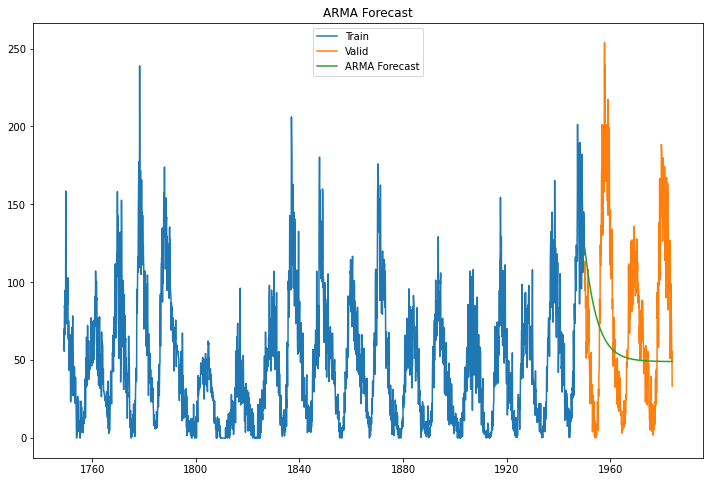

In [1028]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='ARMA Forecast') 
plt.legend(loc='best') 
plt.title("ARMA Forecast") 
plt.show()

In [1029]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

62.922217161407744


Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [1030]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model =SARIMAX(Train.Sunspots, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



1950-01-01    124.394134
1950-02-01    126.641816
1950-03-01    126.739965
1950-04-01    126.287854
1950-05-01    125.717846
                 ...    
1983-08-01   -113.058468
1983-09-01   -113.656921
1983-10-01   -114.255374
1983-11-01   -114.853827
1983-12-01   -115.452280
Freq: MS, Length: 408, dtype: float64


In [1031]:
y_hat = yhat.values
y_hat

array([ 1.24394134e+02,  1.26641816e+02,  1.26739965e+02,  1.26287854e+02,
        1.25717846e+02,  1.25124667e+02,  1.24527161e+02,  1.23928875e+02,
        1.23330450e+02,  1.22732002e+02,  1.22133550e+02,  1.21535097e+02,
        1.20936644e+02,  1.20338191e+02,  1.19739738e+02,  1.19141285e+02,
        1.18542832e+02,  1.17944379e+02,  1.17345926e+02,  1.16747473e+02,
        1.16149021e+02,  1.15550568e+02,  1.14952115e+02,  1.14353662e+02,
        1.13755209e+02,  1.13156756e+02,  1.12558303e+02,  1.11959850e+02,
        1.11361397e+02,  1.10762944e+02,  1.10164491e+02,  1.09566038e+02,
        1.08967585e+02,  1.08369132e+02,  1.07770679e+02,  1.07172226e+02,
        1.06573773e+02,  1.05975320e+02,  1.05376867e+02,  1.04778414e+02,
        1.04179961e+02,  1.03581508e+02,  1.02983055e+02,  1.02384602e+02,
        1.01786149e+02,  1.01187696e+02,  1.00589243e+02,  9.99907902e+01,
        9.93923373e+01,  9.87938843e+01,  9.81954313e+01,  9.75969783e+01,
        9.69985254e+01,  

In [1032]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,124.394134
1,94.8,126.641816
2,109.7,126.739965
3,113.4,126.287854
4,106.2,125.717846
...,...,...
403,71.8,-113.058468
404,50.3,-113.656921
405,55.8,-114.255374
406,33.3,-114.853827


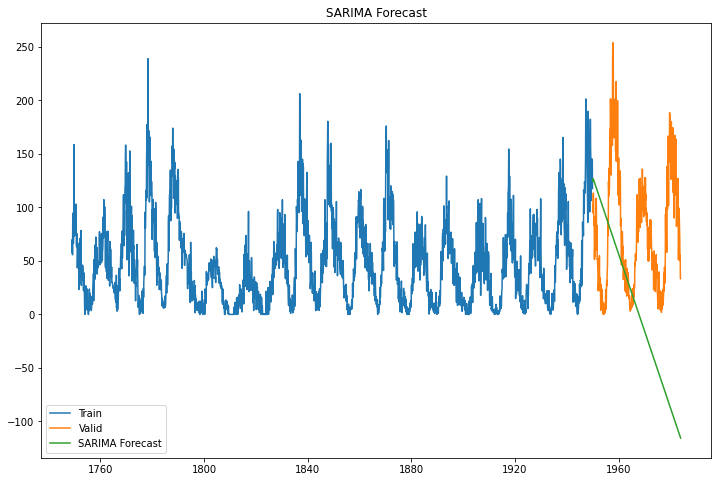

In [1033]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='SARIMA Forecast') 
plt.legend(loc='best') 
plt.title("SARIMA Forecast") 
plt.show()

In [1034]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

117.62468746246252


Simple Exponential Smoothing (SES)

In [1035]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model =SimpleExpSmoothing(Train.Sunspots)
model_fit = model.fit(smoothing_level=0.6,optimized=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

print(yhat)

1950-01-01    126.390287
1950-02-01    126.390287
1950-03-01    126.390287
1950-04-01    126.390287
1950-05-01    126.390287
                 ...    
1983-08-01    126.390287
1983-09-01    126.390287
1983-10-01    126.390287
1983-11-01    126.390287
1983-12-01    126.390287
Freq: MS, Length: 408, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1036]:
y_hat = yhat.values
y_hat

array([126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39

In [1037]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,126.390287
1,94.8,126.390287
2,109.7,126.390287
3,113.4,126.390287
4,106.2,126.390287
...,...,...
403,71.8,126.390287
404,50.3,126.390287
405,55.8,126.390287
406,33.3,126.390287


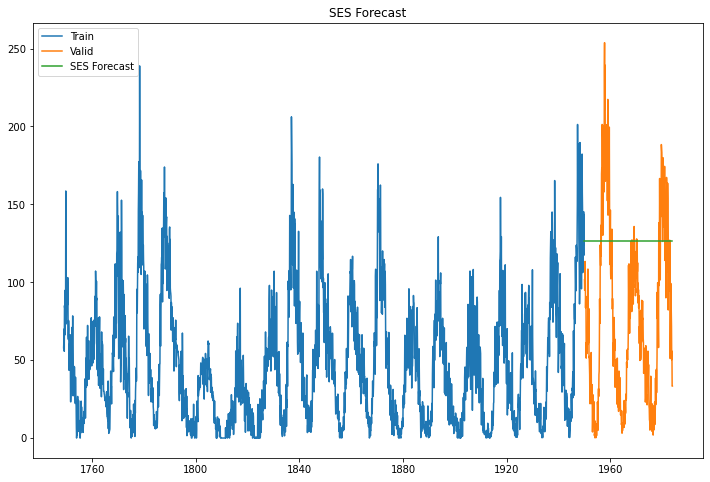

In [1038]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='SES Forecast') 
plt.legend(loc='best') 
plt.title("SES Forecast") 
plt.show()

In [1039]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

75.07573399723866


Holt Winter’s Exponential Smoothing (HWES)

In [1040]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(Train.Sunspots)
model_fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

print(yhat)

1950-01-01    130.430102
1950-02-01    130.430102
1950-03-01    130.430102
1950-04-01    130.430102
1950-05-01    130.430102
                 ...    
1983-08-01    130.430102
1983-09-01    130.430102
1983-10-01    130.430102
1983-11-01    130.430102
1983-12-01    130.430102
Freq: MS, Length: 408, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1041]:
y_hat = yhat.values
y_hat

array([130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43

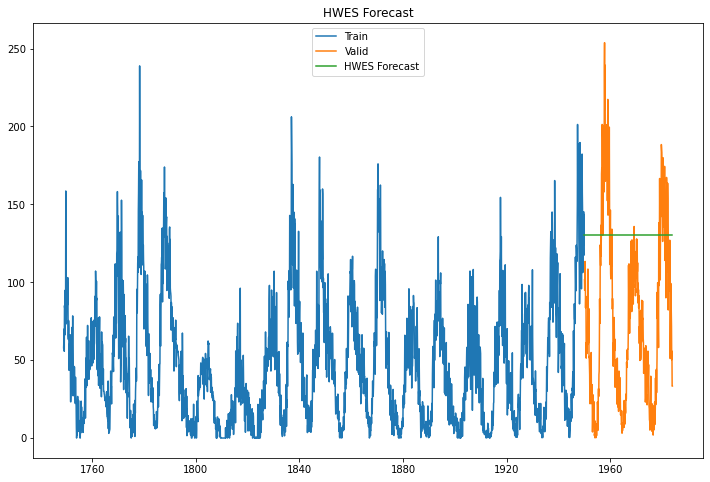

In [1042]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='HWES Forecast') 
plt.legend(loc='best') 
plt.title("HWES Forecast") 
plt.show()

In [1043]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

77.79091367156943


FB Prophet

In [1044]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(train, label='Sunspots')

features_and_target = pd.concat([X, y], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [1045]:
# See our features and target
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sunspots
Timestamp,,,,,,,,,
1749-01-01,0,2,1,1,1749,1,1,1,58.0
1749-02-01,0,5,1,2,1749,32,1,5,62.6
1749-03-01,0,5,1,3,1749,60,1,9,70.0
1749-04-01,0,1,2,4,1749,91,1,14,55.7
1749-05-01,0,3,2,5,1749,121,1,18,85.0
...,...,...,...,...,...,...,...,...,...
1983-08-01,0,0,3,8,1983,213,1,31,71.8
1983-09-01,0,3,3,9,1983,244,1,35,50.3
1983-10-01,0,5,4,10,1983,274,1,39,55.8


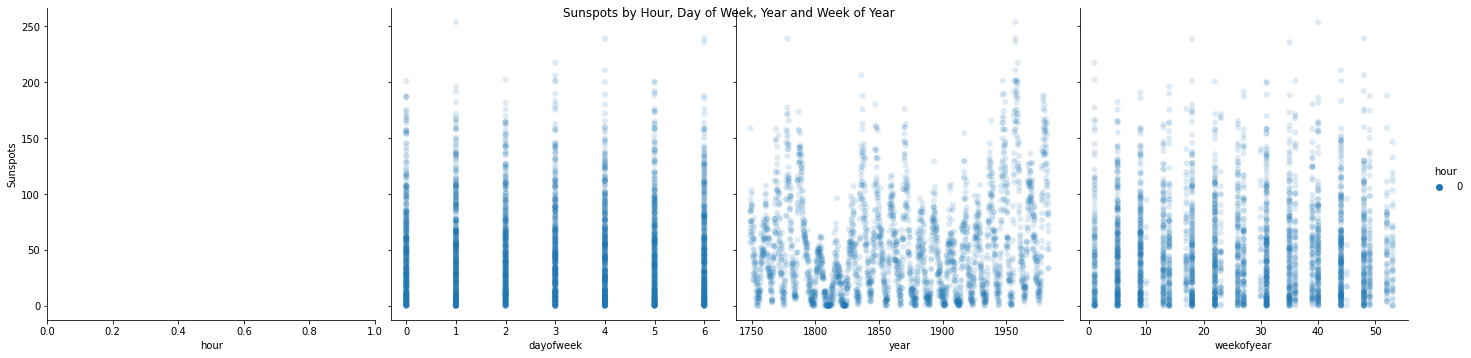

In [1046]:
import seaborn as sns

sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Sunspots',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Sunspots by Hour, Day of Week, Year and Week of Year')
plt.show()

In [1047]:
split_date = '01-01-1950'
s_train = train.loc[train.index <= split_date].copy()
s_val = train.loc[train.index > split_date].copy()

In [1048]:
s_val

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1950-02-01,1950-02,94.8,1950,02,1950-02-01
1950-03-01,1950-03,109.7,1950,03,1950-03-01
1950-04-01,1950-04,113.4,1950,04,1950-04-01
1950-05-01,1950-05,106.2,1950,05,1950-05-01
1950-06-01,1950-06,83.6,1950,06,1950-06-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


In [1049]:
s_val.drop(['Month', 'Year', 'Month_Num', 'Timestamp'], axis=1, inplace=True)
s_train.drop(['Month', 'Year', 'Month_Num', 'Timestamp'],axis=1, inplace=True)

In [1050]:
s_val

,Sunspots
Timestamp,
1950-02-01,94.8
1950-03-01,109.7
1950-04-01,113.4
1950-05-01,106.2
1950-06-01,83.6
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


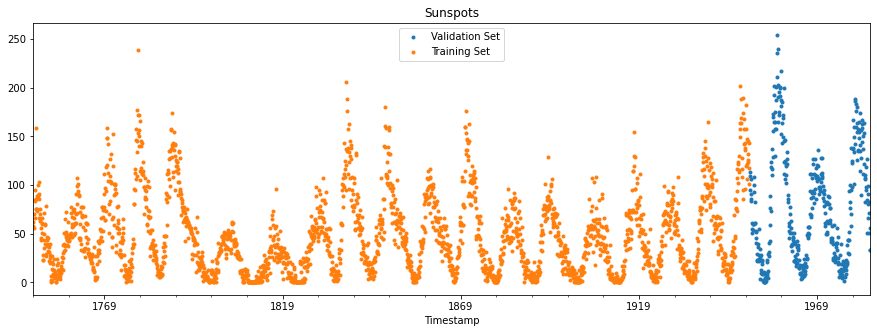

In [1051]:
# Plot train and val so you can see where we have split
s_val \
    .rename(columns={'Sunspots': 'Validation Set'}) \
    .join(s_train.rename(columns={'Sunspots': 'Training Set'}),
          how='outer') \
    .plot(figsize=(15,5), title='Sunspots', style='.')
plt.show()

In [1052]:
# Format data for prophet model using ds and y
s_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'Count':'y'})

,Timestamp,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2408,1949-09-01,145.3
2409,1949-10-01,131.6
2410,1949-11-01,143.5
2411,1949-12-01,117.6


In [1053]:
s_train

,Sunspots
Timestamp,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1949-09-01,145.3
1949-10-01,131.6
1949-11-01,143.5


In [1054]:
s_train['Datetime'] = s_train.index
s_val['Datetime'] = s_val.index

In [1055]:
# Setup and train model and fit
from fbprophet import Prophet

model = Prophet()
model.fit(s_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'Sunspots':'y'}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1056]:
# Predict on validation set with model
s_val_fcst = model.predict(df=s_val.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))
s_val_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-02-01,70.955538,22.913993,119.814076,70.955538,70.955538,1.751936,1.751936,1.751936,1.751936,1.751936,1.751936,0.0,0.0,0.0,72.707474
1,1950-03-01,71.021177,23.826007,119.145342,71.021177,71.021177,0.441034,0.441034,0.441034,0.441034,0.441034,0.441034,0.0,0.0,0.0,71.462212
2,1950-04-01,71.093849,21.698277,118.102285,71.093849,71.093849,-0.896170,-0.896170,-0.896170,-0.896170,-0.896170,-0.896170,0.0,0.0,0.0,70.197680
3,1950-05-01,71.164177,21.653613,118.345133,71.164177,71.164177,-1.453546,-1.453546,-1.453546,-1.453546,-1.453546,-1.453546,0.0,0.0,0.0,69.710632
4,1950-06-01,71.236849,24.730186,120.358742,71.236849,71.236849,-0.277005,-0.277005,-0.277005,-0.277005,-0.277005,-0.277005,0.0,0.0,0.0,70.959844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1983-08-01,99.635223,50.391831,148.998157,87.247871,109.994173,2.259353,2.259353,2.259353,2.259353,2.259353,2.259353,0.0,0.0,0.0,101.894576
403,1983-09-01,99.707895,50.550034,149.696727,87.286021,110.133946,0.215965,0.215965,0.215965,0.215965,0.215965,0.215965,0.0,0.0,0.0,99.923860
404,1983-10-01,99.778223,51.919502,149.812037,87.322941,110.276925,1.836021,1.836021,1.836021,1.836021,1.836021,1.836021,0.0,0.0,0.0,101.614244
405,1983-11-01,99.850895,53.616914,146.298023,87.361091,110.347188,-2.492826,-2.492826,-2.492826,-2.492826,-2.492826,-2.492826,0.0,0.0,0.0,97.358069


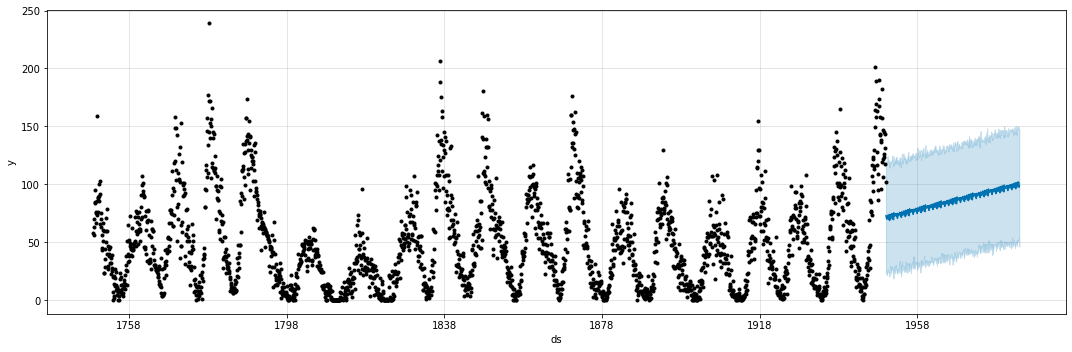

In [1057]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(s_val_fcst,
                 ax=ax)
plt.show()

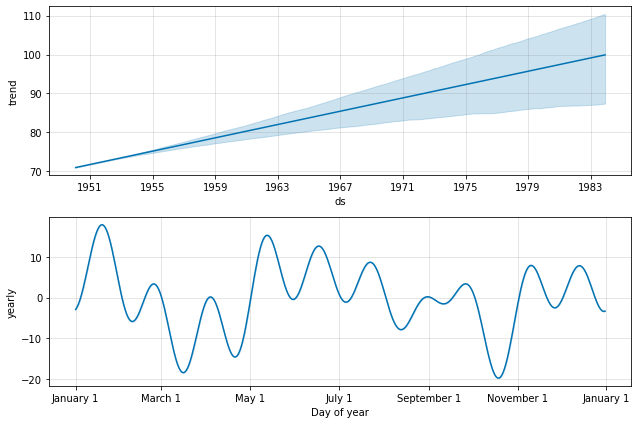

In [1058]:
# Plot the components of the model
fig = model.plot_components(s_val_fcst)

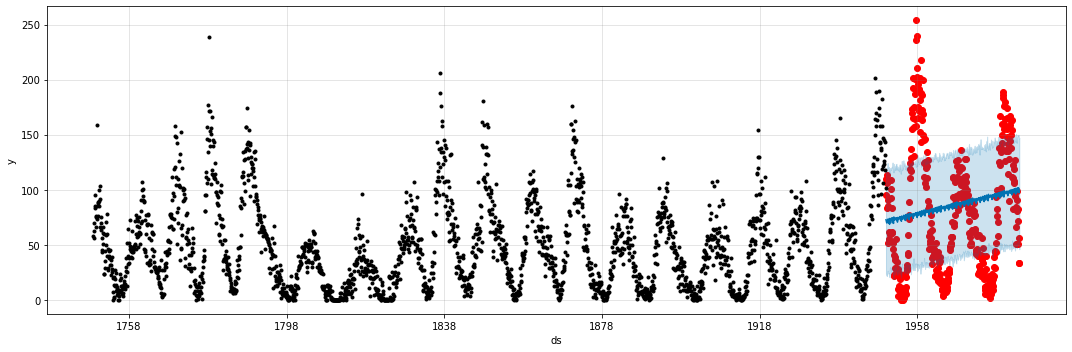

In [1059]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(s_val.index, s_val['Sunspots'], color='r')
fig = model.plot(s_val_fcst, ax=ax)

In [1060]:
mean_squared_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

3267.5235598556296

In [1061]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

48.338911053858325

In [1062]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

470.2414308936644

In [1063]:
y_true = s_val.Sunspots.values
y_true

array([9.480e+01, 1.097e+02, 1.134e+02, 1.062e+02, 8.360e+01, 9.100e+01,
       8.520e+01, 5.130e+01, 6.140e+01, 5.480e+01, 5.410e+01, 5.990e+01,
       5.990e+01, 5.990e+01, 9.290e+01, 1.085e+02, 1.006e+02, 6.150e+01,
       6.100e+01, 8.310e+01, 5.160e+01, 5.240e+01, 4.580e+01, 4.070e+01,
       2.270e+01, 2.200e+01, 2.910e+01, 2.340e+01, 3.640e+01, 3.930e+01,
       5.490e+01, 2.820e+01, 2.380e+01, 2.210e+01, 3.430e+01, 2.650e+01,
       3.900e+00, 1.000e+01, 2.780e+01, 1.250e+01, 2.180e+01, 8.600e+00,
       2.350e+01, 1.930e+01, 8.200e+00, 1.600e+00, 2.500e+00, 2.000e-01,
       5.000e-01, 1.090e+01, 1.800e+00, 8.000e-01, 2.000e-01, 4.800e+00,
       8.400e+00, 1.500e+00, 7.000e+00, 9.200e+00, 7.600e+00, 2.310e+01,
       2.080e+01, 4.900e+00, 1.130e+01, 2.890e+01, 3.170e+01, 2.670e+01,
       4.070e+01, 4.270e+01, 5.850e+01, 8.920e+01, 7.690e+01, 7.360e+01,
       1.240e+02, 1.184e+02, 1.107e+02, 1.366e+02, 1.166e+02, 1.291e+02,
       1.696e+02, 1.732e+02, 1.553e+02, 2.013e+02, 

In [1064]:
y_hat = s_val_fcst.yhat.astype(int)
y_hat

0       72
1       71
2       70
3       69
4       70
      ... 
402    101
403     99
404    101
405     97
406     98
Name: yhat, Length: 407, dtype: int64

In [1065]:
dfval=pd.DataFrame({'Actual': y_true, 'Predicted': y_hat})
dfval.reset_index(drop=True, inplace=True)
dfval

,Actual,Predicted
0,94.8,72
1,109.7,71
2,113.4,70
3,106.2,69
4,83.6,70
...,...,...
402,71.8,101
403,50.3,99
404,55.8,101
405,33.3,97


Random Forest

In [1067]:
X = train.index.factorize()[0].reshape(-1,1) 
y = train['Sunspots'].values

In [1068]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2397, 1), (2397,), (423, 1), (423,))

In [1069]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9843857711375945


In [1070]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.902322230906963


In [1071]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

14.323531481295886


In [1072]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,38.1,51.4364
1,42.7,40.3826
2,13.2,5.9623
3,71.8,49.4726
4,71.6,64.4772
...,...,...
418,80.6,78.6259
419,73.6,90.9563
420,30.1,37.3575
421,57.0,52.3499


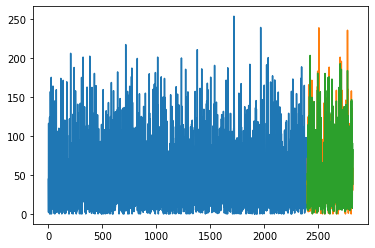

In [1073]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()